In [1]:
from IPython.display import SVG, display_svg
import os

from src.diagrams.tikz import circuit_to_tikz_file
from src.input.circuits_and_matrices import circuit_to_matrix
from src.algorithm.vanilla.circuit_synthesis import synthesise_circuit
from src.algorithm.vanilla.execution import check_and_run

In [2]:
circuit_file_prefix = 'Circuit'
demo_dir = r'resources\demo'

In [3]:
def circuit_to_svg(circuit, size, diagram_dir, file_prefix):

    num_gates = len(circuit)

    file_name = rf'{file_prefix}_{size}_{num_gates}'

    tikz_file_path = rf'..\{diagram_dir}\{file_name}.tikz'

    circuit_to_tikz_file(circuit, size, tikz_file_path)

    wsl_tikz_path = rf'\mnt\c\Dev\cnot_synthesis\{diagram_dir}\{file_name}.tikz'.replace('\\','/')

    command_string = rf'wsl tikztosvg -p tikz-cd -p xfrac {wsl_tikz_path} > /dev/null 2>&1'
    os.system(command_string)

    os.remove(rf'..\{diagram_dir}\{file_name}.tikz')

    return file_name + '.svg'

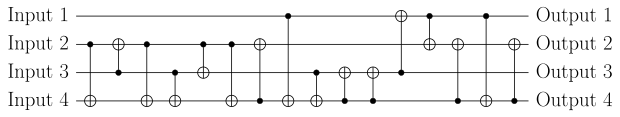

input circuit size: 16

input circuit wire index tuples: 
[(1, 3), (2, 1), (1, 3), (2, 3), (1, 2), (1, 3), (3, 1), (0, 3), (2, 3), (3, 2), (3, 2), (2, 0), (0, 1), (3, 1), (0, 3), (3, 1)]



In [4]:
input_circuit = [(1, 3), (2, 1), (1, 3), (2, 3), (1, 2), (1, 3), (3, 1), (0, 3), (2, 3), (3, 2), (3, 2), (2, 0), (0, 1), (3, 1), (0, 3), (3, 1)]
circuit_size = 4

input_diagram_file_name = circuit_to_svg(input_circuit, circuit_size, demo_dir, circuit_file_prefix + '_in')
display_svg(SVG(rf'..\{demo_dir}\{input_diagram_file_name}'))

print(f'input circuit size: {len(input_circuit)}\n')
print(f'input circuit wire index tuples: \n{input_circuit}\n')

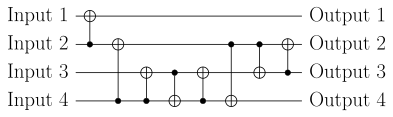


synthesised with section width: 8

output circuit size: 8

output circuit wire index tuples: 
[(1, 0), (3, 1), (3, 2), (2, 3), (3, 2), (1, 3), (1, 2), (2, 1)]



In [7]:
mat = circuit_to_matrix(input_circuit, circuit_size)

sec_width = 8

_, output_circuit = check_and_run(synthesise_circuit, mat, sec_width)

output_diagram_file_name = circuit_to_svg(output_circuit, circuit_size, demo_dir, circuit_file_prefix + '_out')
display_svg(SVG(rf'..\{demo_dir}\{output_diagram_file_name}'))

print(f'\nsynthesised with section width: {sec_width}\n')
print(f'output circuit size: {len(output_circuit)}\n')
print(f'output circuit wire index tuples: \n{output_circuit}\n')

